In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [24]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-05-27 20:03:17.984506: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 20:03:17.987732: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-27 20:03:18.528719: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 20:03:18.531256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
masks = C.Helper.load_seg_data(CAPATH)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13152, 512, 512, 1) (13152, 512, 512, 1) (3614, 512, 512, 1) (3614, 512, 512, 1)


In [11]:
y_test = y_test.astype(np.float64)

In [12]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13152, 512, 512, 1) (3614, 512, 512, 1)


In [13]:
X_train, y_train, m_train = C.Helper.filter_slices(X_train, y_train, m_train)

(609, 512, 512, 1) (609, 512, 512, 1) (609, 512, 512, 1)


In [14]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(609, 512, 512, 1) (3614, 512, 512, 1)


In [15]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [16]:
X_train_set = X_train_set.astype(np.float64)
X_val = X_val.astype(np.float64)

In [19]:
train_gen = C.Helper.augment(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [20]:
model = C.Helper.create_swinUNet(X_train_set[0].shape)

2024-05-27 20:07:03.607298: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 20:07:03.610046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 20:07:03.619656: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2024-05-27 20:07:03.622564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-27 20:07:03.624988: I tensorflow/core

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [25]:
model, history = C.Helper.train_swinUNet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=100)

Epoch 1/100
30/30 [==============================] - 60s 1s/step - loss: 0.0635 - iou: 0.0011 - iou_thresholded: 0.0013 - val_loss: 0.0050 - val_iou: 0.0014 - val_iou_thresholded: 0.0025
Epoch 2/100
30/30 [==============================] - 34s 1s/step - loss: 0.0030 - iou: 0.0118 - iou_thresholded: 0.0110 - val_loss: 0.0011 - val_iou: 0.0102 - val_iou_thresholded: 0.0049
Epoch 3/100
30/30 [==============================] - 33s 1s/step - loss: 0.0022 - iou: 0.0085 - iou_thresholded: 0.0059 - val_loss: 0.0012 - val_iou: 0.0050 - val_iou_thresholded: 0.0026
Epoch 4/100
30/30 [==============================] - 34s 1s/step - loss: 0.0012 - iou: 0.0138 - iou_thresholded: 0.0058 - val_loss: 7.5164e-04 - val_iou: 0.0110 - val_iou_thresholded: 0.0026
Epoch 5/100
30/30 [==============================] - 33s 1s/step - loss: 0.0011 - iou: 0.0147 - iou_thresholded: 0.0056 - val_loss: 6.8561e-04 - val_iou: 0.0222 - val_iou_thresholded: 0.0069
Epoch 6/100
30/30 [==============================] - 34s 

30/30 [==============================] - 33s 1s/step - loss: 5.5726e-04 - iou: 0.1979 - iou_thresholded: 0.2764 - val_loss: 4.3567e-04 - val_iou: 0.1784 - val_iou_thresholded: 0.2889
Epoch 44/100
30/30 [==============================] - 34s 1s/step - loss: 5.4833e-04 - iou: 0.1793 - iou_thresholded: 0.2506 - val_loss: 4.1594e-04 - val_iou: 0.1978 - val_iou_thresholded: 0.2926
Epoch 45/100
30/30 [==============================] - 33s 1s/step - loss: 5.9275e-04 - iou: 0.1741 - iou_thresholded: 0.2367 - val_loss: 4.2016e-04 - val_iou: 0.1750 - val_iou_thresholded: 0.2693
Epoch 46/100
30/30 [==============================] - 33s 1s/step - loss: 5.7854e-04 - iou: 0.1702 - iou_thresholded: 0.2420 - val_loss: 4.3695e-04 - val_iou: 0.1617 - val_iou_thresholded: 0.2208
Epoch 47/100
30/30 [==============================] - 34s 1s/step - loss: 6.0259e-04 - iou: 0.1646 - iou_thresholded: 0.2113 - val_loss: 4.2558e-04 - val_iou: 0.1832 - val_iou_thresholded: 0.2855
Epoch 48/100
30/30 [=============

Epoch 85/100
30/30 [==============================] - 33s 1s/step - loss: 4.6039e-04 - iou: 0.2324 - iou_thresholded: 0.3258 - val_loss: 3.5497e-04 - val_iou: 0.2193 - val_iou_thresholded: 0.2843
Epoch 86/100
30/30 [==============================] - 33s 1s/step - loss: 4.8016e-04 - iou: 0.2470 - iou_thresholded: 0.3405 - val_loss: 3.6707e-04 - val_iou: 0.2422 - val_iou_thresholded: 0.3621
Epoch 87/100
30/30 [==============================] - 34s 1s/step - loss: 4.5902e-04 - iou: 0.2614 - iou_thresholded: 0.3669 - val_loss: 3.7645e-04 - val_iou: 0.2295 - val_iou_thresholded: 0.3691
Epoch 88/100
30/30 [==============================] - 33s 1s/step - loss: 4.5963e-04 - iou: 0.2466 - iou_thresholded: 0.3406 - val_loss: 3.6166e-04 - val_iou: 0.2496 - val_iou_thresholded: 0.3503
Epoch 89/100
30/30 [==============================] - 33s 1s/step - loss: 4.4627e-04 - iou: 0.2675 - iou_thresholded: 0.3767 - val_loss: 3.6915e-04 - val_iou: 0.2558 - val_iou_thresholded: 0.3703
Epoch 90/100
30/30 [

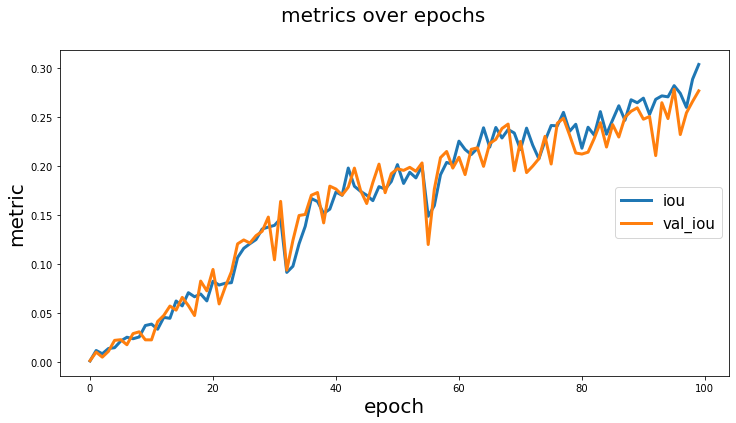

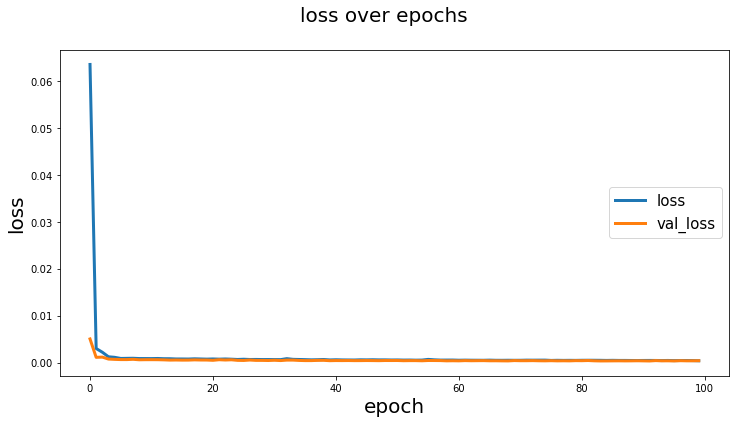

In [26]:
C.Helper.visualize_graph(history)

In [27]:
y_pred = C.Helper.prediction(test_images_array, model)

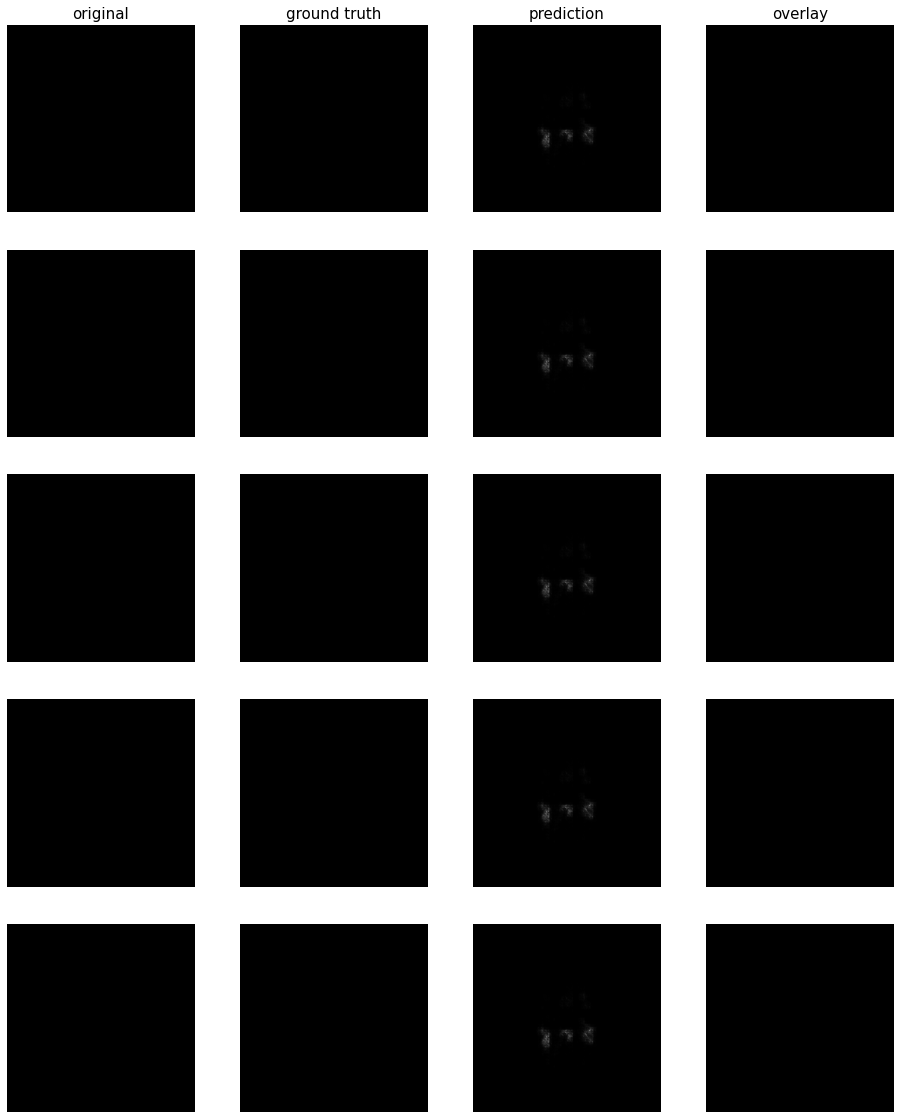

In [28]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

In [29]:
C.Helper.evaluate(test_images_array, y_test, model)

113/113 [==============================] - 51s 447ms/step - loss: 6.0732e-05 - iou: 0.0225 - iou_thresholded: 0.6586
